# EDA, Feature Engineering, & Multiple Regression

In this final notebook we take the wrangled datasets from EIA (Energy Information Administration) , CPI (consumer price index), M_F (Michigan and Florida Consumer Sentiment), and INF (inflation). I will complete EDA, determine what features to keep and engineer, and finish with multiple regression to determine the accuracy of my original question: do prices from various domain, inflation determine consumer sentiment and if so what has the most impact? 


The libraries we will choose for this dataset are:

- Numpy, Pandas, DateTime, Seaborn, Matplotlib, Scikit-Learn, and Statsmodels

In [1]:
#loading libraries for use in this dataset
import numpy as np # number manipulation, statistics
import pandas as pd # dataframe manager
import seaborn as sns # visualizations
import matplotlib.pyplot as plt # visualizations
import sklearn as sk # machine learning library
import pylab
import scipy.stats as stats
import statsmodels.api as sm # show linear regression model accurarcy metrics
import random # to create a random number

The cell below are the wrangled CSV files.

In [2]:
M_F = pd.read_csv('Michigan_Florida.csv') # consumer index for University of Michigan and University of Florida
EIA_CPI_INF = pd.read_csv('EIA_CPI_INF.csv') # Wrangled EIA, Consumer Price Index, and historic inflation rates

Merge will be joined on Date

In [3]:
final = pd.merge(M_F, EIA_CPI_INF, on='Date', how='left')

In [4]:
pd.set_option('display.max_columns', None)
final.head()

,Unnamed: 0_x,Date,Florida_Index_value,Curfin,Futfin,USfufi,USnex5,Gbtime,Michigan_Index_value,Unnamed: 0_y,Resi_Gas,Elect_Price,Bacon Original Data Value,Bacon 1-Month Percent Change,Bacon 3-Month Percent Change,Bacon 12-Month Percent Change,Bananas Original Data Value,Bananas 1-Month Percent Change,Bananas 3-Month Percent Change,Bananas 12-Month Percent Change,Bread Original Data Value,Bread 1-Month Percent Change,Bread 3-Month Percent Change,Bread 12-Month Percent Change,Chicken Original Data Value,Chicken 1-Month Percent Change,Chicken 3-Month Percent Change,Chicken 12-Month Percent Change,Coffee Original Data Value,Coffee 1-Month Percent Change,Coffee 3-Month Percent Change,Coffee 12-Month Percent Change,Eggs Original Data Value,Eggs 1-Month Percent Change,Eggs 3-Month Percent Change,Eggs 12-Month Percent Change,Flour Original Data Value,Flour 1-Month Percent Change,Flour 3-Month Percent Change,Flour 12-Month Percent Change,Milk Original Data Value,Milk 1-Month Percent Change,Milk 3-Month Percent Change,Milk 12-Month Percent Change,Oranges Original Data Value,Oranges 1-Month Percent Change,Oranges 3-Month Percent Change,Oranges 12-Month Percent Change,Rice Original Data Value,Rice 1-Month Percent Change,Rice 3-Month Percent Change,Rice 12-Month Percent Change,Tomatoes Original Data Value,Tomatoes 1-Month Percent Change,Tomatoes 3-Month Percent Change,Tomatoes 12-Month Percent Change,Electricity_CPI Original Data Value,Electricity_CPI 1-Month Percent Change,Electricity_CPI 3-Month Percent Change,Electricity_CPI 12-Month Percent Change,Fuel_Oil_#2 Original Data Value,Fuel_Oil_#2 1-Month Percent Change,Fuel_Oil_#2 3-Month Percent Change,Fuel_Oil_#2 12-Month Percent Change,Gasoline_all_types Original Data Value,Gasoline_all_types 1-Month Percent Change,Gasoline_all_types 3-Month Percent Change,Gasoline_all_types 12-Month Percent Change,Gasoline_unleaded Original Data Value,Gasoline_unleaded 1-Month Percent Change,Gasoline_unleaded 3-Month Percent Change,Gasoline_unleaded 12-Month Percent Change,Inflation
0,0,1990-01-01,88.0,87.0,97.0,76.0,71.0,108.0,93.0,0.0,5.43,NaN,1.966,0.5,11.2,8.9,0.429,3.1,-0.7,8.9,0.689,0.1,2.2,5.5,0.882,-0.1,-3.1,-2.5,2.917,-0.7,-4.0,-1.6,1.223,7.6,19.6,30.0,0.253,3.7,-0.8,11.0,NaN,NaN,NaN,NaN,0.501,-5.1,NaN,-3.8,0.501,-0.6,-2.3,2.5,1.735,93.2,107.5,117.7,0.081,0.0,0.0,2.5,1.259,28.7,41.9,42.6,1.090,5.8,1.8,15.5,1.042,6.3,1.5,13.5,1.03
1,1,1990-02-01,89.0,88.0,96.0,81.0,72.0,109.0,89.5,1.0,5.65,NaN,2.009,2.2,10.4,11.7,0.492,14.7,13.1,18.6,0.701,1.7,3.7,7.5,0.896,1.6,1.9,-0.3,2.965,1.6,2.1,-2.9,1.041,-14.9,-3.6,17.0,0.249,-1.6,0.4,6.9,NaN,NaN,NaN,NaN,0.580,15.8,-0.9,25.0,0.476,-5.0,-4.2,-3.8,2.361,36.1,167.1,124.6,0.081,0.0,1.3,2.5,1.023,-18.7,12.0,15.2,1.086,-0.4,3.8,13.7,1.037,-0.5,3.8,12.0,0.47
2,2,1990-03-01,91.0,86.0,98.0,86.0,72.0,111.0,91.3,2.0,5.60,NaN,1.991,-0.9,1.8,11.4,0.500,1.6,20.2,11.1,0.680,-3.0,-1.2,4.0,0.928,3.6,5.1,1.6,2.891,-2.5,-1.6,-4.9,1.111,6.7,-2.3,7.8,0.252,1.2,3.3,7.7,NaN,NaN,NaN,NaN,0.570,-1.7,8.0,21.0,0.502,5.5,-0.4,2.9,1.765,-25.2,96.5,98.1,0.081,0.0,0.0,2.5,0.987,-3.5,0.9,10.8,1.076,-0.9,4.5,10.5,1.023,-1.4,4.4,8.8,0.55
3,3,1990-04-01,91.0,91.0,99.0,86.0,77.0,103.0,93.9,3.0,5.64,NaN,1.979,-0.6,0.7,13.3,0.481,-3.8,12.1,-8.0,0.686,0.9,-0.4,4.7,0.897,-3.3,1.7,-3.8,2.885,-0.2,-1.1,-7.4,1.092,-1.7,-10.7,9.5,0.251,-0.4,-0.8,5.5,NaN,NaN,NaN,NaN,0.560,-1.8,11.8,9.6,0.497,-1.0,-0.8,3.1,0.732,-58.5,-57.8,-24.5,0.082,1.2,1.2,3.8,0.968,-1.9,-23.1,7.1,1.096,1.9,0.6,-0.2,1.044,2.1,0.2,-2.0,0.16
4,4,1990-05-01,90.0,89.0,102.0,80.0,77.0,104.0,90.6,4.0,6.00,NaN,2.044,3.3,1.7,21.7,0.462,-4.0,-6.1,-11.5,0.678,-1.2,-3.3,3.5,0.902,0.6,0.7,-6.1,2.938,1.8,-0.9,-7.1,0.940,-13.9,-9.7,-1.7,0.254,1.2,2.0,5.4,NaN,NaN,NaN,NaN,0.578,3.2,-0.3,8.2,0.496,-0.2,4.2,2.3,0.697,-4.8,-70.5,-47.3,0.082,0.0,1.2,2.5,0.952,-1.7,-6.9,7.3,1.114,1.6,2.6,-3.3,1.061,1.6,2.3,-5.2,0.23


Dropping these Unnamed:0_x and y columns

In [5]:
final.drop('Unnamed: 0_x', axis=1, inplace=True)
final.drop('Unnamed: 0_y', axis=1, inplace=True)

Check of datatypes

In [6]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 380
Data columns (total 71 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Date                                        381 non-null    object 
 1   Florida_Index_value                         381 non-null    float64
 2   Curfin                                      381 non-null    float64
 3   Futfin                                      381 non-null    float64
 4   USfufi                                      381 non-null    float64
 5   USnex5                                      381 non-null    float64
 6   Gbtime                                      381 non-null    float64
 7   Michigan_Index_value                        381 non-null    float64
 8   Resi_Gas                                    380 non-null    float64
 9   Elect_Price                                 248 non-null    float64
 10  Bacon Original

#### Date needs to be changed to a datetime object and this will be the index to isolate rows for the future

In [7]:
final['Date'] = pd.to_datetime(final['Date']) # converting to datetime value
final.set_index('Date', inplace = True)

#### Doing a check of null values

In [8]:
null = pd.DataFrame(final.isnull().sum()/len(final)*100) # creating a percent count of null values in each column
pd.set_option('display.max_rows', None) # View the entire list of rows in the dataframe
null.sort_values(by=0, ascending=False) # sort values by highest percentage

,0
Oranges 3-Month Percent Change,36.220472
Elect_Price,34.908136
Oranges 1-Month Percent Change,28.083990
Oranges 12-Month Percent Change,26.509186
Oranges Original Data Value,22.572178
Milk 12-Month Percent Change,20.734908
Milk 3-Month Percent Change,18.372703
Milk 1-Month Percent Change,17.847769
Milk Original Data Value,17.585302
Coffee 12-Month Percent Change,17.060367


### Dropping date range for Residential Gas and Electrical prices

In the first initial review of null values I saw that electrice price was significant. For the sake of this data analysis I will consider dropping a date range of 1990-2000. The intial pull of data from the EIA api was from 1990 to 2021. Two decades worth of data is still significant, 2001 to August 2021. 

In [9]:
final = final.drop(final.index[0:132])
final.head(2)

,Florida_Index_value,Curfin,Futfin,USfufi,USnex5,Gbtime,Michigan_Index_value,Resi_Gas,Elect_Price,Bacon Original Data Value,Bacon 1-Month Percent Change,Bacon 3-Month Percent Change,Bacon 12-Month Percent Change,Bananas Original Data Value,Bananas 1-Month Percent Change,Bananas 3-Month Percent Change,Bananas 12-Month Percent Change,Bread Original Data Value,Bread 1-Month Percent Change,Bread 3-Month Percent Change,Bread 12-Month Percent Change,Chicken Original Data Value,Chicken 1-Month Percent Change,Chicken 3-Month Percent Change,Chicken 12-Month Percent Change,Coffee Original Data Value,Coffee 1-Month Percent Change,Coffee 3-Month Percent Change,Coffee 12-Month Percent Change,Eggs Original Data Value,Eggs 1-Month Percent Change,Eggs 3-Month Percent Change,Eggs 12-Month Percent Change,Flour Original Data Value,Flour 1-Month Percent Change,Flour 3-Month Percent Change,Flour 12-Month Percent Change,Milk Original Data Value,Milk 1-Month Percent Change,Milk 3-Month Percent Change,Milk 12-Month Percent Change,Oranges Original Data Value,Oranges 1-Month Percent Change,Oranges 3-Month Percent Change,Oranges 12-Month Percent Change,Rice Original Data Value,Rice 1-Month Percent Change,Rice 3-Month Percent Change,Rice 12-Month Percent Change,Tomatoes Original Data Value,Tomatoes 1-Month Percent Change,Tomatoes 3-Month Percent Change,Tomatoes 12-Month Percent Change,Electricity_CPI Original Data Value,Electricity_CPI 1-Month Percent Change,Electricity_CPI 3-Month Percent Change,Electricity_CPI 12-Month Percent Change,Fuel_Oil_#2 Original Data Value,Fuel_Oil_#2 1-Month Percent Change,Fuel_Oil_#2 3-Month Percent Change,Fuel_Oil_#2 12-Month Percent Change,Gasoline_all_types Original Data Value,Gasoline_all_types 1-Month Percent Change,Gasoline_all_types 3-Month Percent Change,Gasoline_all_types 12-Month Percent Change,Gasoline_unleaded Original Data Value,Gasoline_unleaded 1-Month Percent Change,Gasoline_unleaded 3-Month Percent Change,Gasoline_unleaded 12-Month Percent Change,Inflation
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,93.3,96.0,103.0,86.0,87.0,101.0,94.7,10.12,7.73,2.994,-1.1,-2.4,8.9,0.500,2.7,0.8,2.0,0.982,-0.5,5.1,8.3,1.091,1.2,0.1,3.0,3.224,0.4,-2.8,-8.9,1.011,5.4,9.5,3.7,0.304,10.5,-0.7,6.3,2.852,2.4,1.7,2.4,0.638,2.2,NaN,5.1,NaN,NaN,NaN,NaN,1.414,-9.8,1.9,-2.0,0.088,2.3,0.0,4.8,1.509,-1.2,3.9,26.9,1.525,-1.2,-5.5,12.5,1.472,-1.1,-5.6,13.1,0.63
2001-02-01,92.0,91.0,98.0,83.0,85.0,102.0,90.6,10.26,8.04,3.065,2.4,0.4,6.8,0.496,-0.8,3.5,-6.1,0.994,1.2,4.3,7.6,1.090,-0.1,2.3,4.2,3.217,-0.2,-0.8,-12.5,0.943,-6.7,4.5,-2.0,0.307,1.0,17.2,15.0,2.847,-0.2,3.4,2.5,0.660,3.4,-9.0,12.6,NaN,NaN,NaN,NaN,1.313,-7.1,-12.6,2.1,0.088,0.0,2.3,3.5,1.463,-3.0,-0.9,-9.4,1.538,0.9,-4.4,8.2,1.484,0.8,-4.6,8.4,0.40


There also appears to be the month of September 2021 is missing values almost across the entire dataset. This row will be dropped as well.

In [10]:
final.tail()

,Florida_Index_value,Curfin,Futfin,USfufi,USnex5,Gbtime,Michigan_Index_value,Resi_Gas,Elect_Price,Bacon Original Data Value,Bacon 1-Month Percent Change,Bacon 3-Month Percent Change,Bacon 12-Month Percent Change,Bananas Original Data Value,Bananas 1-Month Percent Change,Bananas 3-Month Percent Change,Bananas 12-Month Percent Change,Bread Original Data Value,Bread 1-Month Percent Change,Bread 3-Month Percent Change,Bread 12-Month Percent Change,Chicken Original Data Value,Chicken 1-Month Percent Change,Chicken 3-Month Percent Change,Chicken 12-Month Percent Change,Coffee Original Data Value,Coffee 1-Month Percent Change,Coffee 3-Month Percent Change,Coffee 12-Month Percent Change,Eggs Original Data Value,Eggs 1-Month Percent Change,Eggs 3-Month Percent Change,Eggs 12-Month Percent Change,Flour Original Data Value,Flour 1-Month Percent Change,Flour 3-Month Percent Change,Flour 12-Month Percent Change,Milk Original Data Value,Milk 1-Month Percent Change,Milk 3-Month Percent Change,Milk 12-Month Percent Change,Oranges Original Data Value,Oranges 1-Month Percent Change,Oranges 3-Month Percent Change,Oranges 12-Month Percent Change,Rice Original Data Value,Rice 1-Month Percent Change,Rice 3-Month Percent Change,Rice 12-Month Percent Change,Tomatoes Original Data Value,Tomatoes 1-Month Percent Change,Tomatoes 3-Month Percent Change,Tomatoes 12-Month Percent Change,Electricity_CPI Original Data Value,Electricity_CPI 1-Month Percent Change,Electricity_CPI 3-Month Percent Change,Electricity_CPI 12-Month Percent Change,Fuel_Oil_#2 Original Data Value,Fuel_Oil_#2 1-Month Percent Change,Fuel_Oil_#2 3-Month Percent Change,Fuel_Oil_#2 12-Month Percent Change,Gasoline_all_types Original Data Value,Gasoline_all_types 1-Month Percent Change,Gasoline_all_types 3-Month Percent Change,Gasoline_all_types 12-Month Percent Change,Gasoline_unleaded Original Data Value,Gasoline_unleaded 1-Month Percent Change,Gasoline_unleaded 3-Month Percent Change,Gasoline_unleaded 12-Month Percent Change,Inflation
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-01,81.2,73.5,90.3,82.5,83.1,76.7,82.9,14.13,13.71,6.346,2.1,9.8,18.7,0.600,-0.7,1.7,1.9,1.511,0.1,-1.7,7.0,1.486,-1.9,-6.1,NaN,4.566,-3.9,-2.3,2.2,1.625,0.3,1.8,-0.9,0.439,0.5,-0.2,-4.8,3.497,1.5,3.8,8.9,1.317,-0.2,-0.3,8.9,0.801,2.0,2.8,7.1,1.804,1.0,-1.8,-2.5,0.140,0.7,2.2,4.5,2.825,1.4,1.3,48.3,3.041,4.6,18.8,56.3,2.972,4.7,19.1,58.2,0.80
2021-06-01,81.9,76.3,90.9,82.6,84.1,75.8,85.5,17.73,13.85,6.670,5.1,14.0,15.6,0.595,-0.8,0.2,1.2,1.510,-0.1,-1.0,2.4,1.474,-0.8,-4.5,-15.6,4.605,0.9,-1.4,1.9,1.642,1.0,1.0,5.7,0.356,-18.9,-18.3,-23.9,3.557,1.7,6.2,11.2,1.354,2.8,7.0,4.5,0.778,-2.9,0.8,3.9,1.830,1.4,3.5,-4.8,0.142,1.4,2.9,3.6,2.952,4.5,2.7,43.5,3.245,6.7,13.6,51.6,3.154,6.1,13.0,51.9,0.93
2021-07-01,83.4,75.8,93.8,85.2,87.4,74.8,81.2,19.94,13.90,6.857,2.8,10.3,18.7,0.594,-0.2,-1.7,2.4,1.491,-1.3,-1.3,0.4,1.435,-2.6,-5.3,-16.2,4.562,-0.9,-4.0,0.6,1.642,0.0,1.4,17.2,0.368,3.4,-15.8,-20.2,3.627,2.0,5.2,11.4,NaN,NaN,NaN,NaN,0.782,0.5,-0.4,1.3,1.827,-0.2,2.3,-7.6,0.143,0.7,2.9,4.4,2.980,0.9,7.0,39.6,3.326,2.5,14.4,48.3,3.233,2.5,13.9,48.6,0.48
2021-08-01,78.5,71.6,90.8,78.6,78.5,72.9,70.3,20.96,13.99,7.096,3.5,11.8,27.6,0.589,-0.8,-1.8,2.3,1.467,-1.6,-2.9,-1.9,1.472,2.6,-0.9,-8.5,4.726,3.6,3.5,4.9,1.709,4.1,5.2,28.7,0.371,0.8,-15.5,-19.2,3.560,-1.8,1.8,4.5,NaN,NaN,NaN,NaN,0.784,0.3,-2.1,2.0,1.858,1.7,3.0,-0.9,0.144,0.7,2.9,5.1,2.932,-1.6,3.8,35.7,3.351,0.8,10.2,49.3,3.255,0.7,9.5,49.5,0.21
2021-09-01,74.9,71.4,89.4,72.6,72.0,69.1,72.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
final.shape

(249, 70)

Confirm the shape size to determine which is the last row to drop.

In [12]:
# Drop the last row of the dataset
final = final.drop(final.index[248])
final.tail()

,Florida_Index_value,Curfin,Futfin,USfufi,USnex5,Gbtime,Michigan_Index_value,Resi_Gas,Elect_Price,Bacon Original Data Value,Bacon 1-Month Percent Change,Bacon 3-Month Percent Change,Bacon 12-Month Percent Change,Bananas Original Data Value,Bananas 1-Month Percent Change,Bananas 3-Month Percent Change,Bananas 12-Month Percent Change,Bread Original Data Value,Bread 1-Month Percent Change,Bread 3-Month Percent Change,Bread 12-Month Percent Change,Chicken Original Data Value,Chicken 1-Month Percent Change,Chicken 3-Month Percent Change,Chicken 12-Month Percent Change,Coffee Original Data Value,Coffee 1-Month Percent Change,Coffee 3-Month Percent Change,Coffee 12-Month Percent Change,Eggs Original Data Value,Eggs 1-Month Percent Change,Eggs 3-Month Percent Change,Eggs 12-Month Percent Change,Flour Original Data Value,Flour 1-Month Percent Change,Flour 3-Month Percent Change,Flour 12-Month Percent Change,Milk Original Data Value,Milk 1-Month Percent Change,Milk 3-Month Percent Change,Milk 12-Month Percent Change,Oranges Original Data Value,Oranges 1-Month Percent Change,Oranges 3-Month Percent Change,Oranges 12-Month Percent Change,Rice Original Data Value,Rice 1-Month Percent Change,Rice 3-Month Percent Change,Rice 12-Month Percent Change,Tomatoes Original Data Value,Tomatoes 1-Month Percent Change,Tomatoes 3-Month Percent Change,Tomatoes 12-Month Percent Change,Electricity_CPI Original Data Value,Electricity_CPI 1-Month Percent Change,Electricity_CPI 3-Month Percent Change,Electricity_CPI 12-Month Percent Change,Fuel_Oil_#2 Original Data Value,Fuel_Oil_#2 1-Month Percent Change,Fuel_Oil_#2 3-Month Percent Change,Fuel_Oil_#2 12-Month Percent Change,Gasoline_all_types Original Data Value,Gasoline_all_types 1-Month Percent Change,Gasoline_all_types 3-Month Percent Change,Gasoline_all_types 12-Month Percent Change,Gasoline_unleaded Original Data Value,Gasoline_unleaded 1-Month Percent Change,Gasoline_unleaded 3-Month Percent Change,Gasoline_unleaded 12-Month Percent Change,Inflation
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-01,83.0,72.6,92.3,85.7,87.5,76.7,88.3,12.25,13.76,6.215,6.2,6.6,16.3,0.604,1.7,1.2,4.0,1.510,-1.0,-2.3,7.4,1.515,-1.8,-5.0,-3.6,4.752,1.7,3.5,8.1,1.620,-0.3,10.5,-19.8,0.437,0.2,-2.0,NaN,3.447,3.0,-0.6,5.5,1.320,4.3,1.3,NaN,0.785,1.7,-1.1,NaN,1.786,1.0,-7.4,NaN,0.139,0.7,2.2,4.5,2.785,-3.1,9.3,36.3,2.907,1.8,21.6,49.4,2.839,1.7,22.1,51.3,0.82
2021-05-01,81.2,73.5,90.3,82.5,83.1,76.7,82.9,14.13,13.71,6.346,2.1,9.8,18.7,0.600,-0.7,1.7,1.9,1.511,0.1,-1.7,7.0,1.486,-1.9,-6.1,NaN,4.566,-3.9,-2.3,2.2,1.625,0.3,1.8,-0.9,0.439,0.5,-0.2,-4.8,3.497,1.5,3.8,8.9,1.317,-0.2,-0.3,8.9,0.801,2.0,2.8,7.1,1.804,1.0,-1.8,-2.5,0.140,0.7,2.2,4.5,2.825,1.4,1.3,48.3,3.041,4.6,18.8,56.3,2.972,4.7,19.1,58.2,0.80
2021-06-01,81.9,76.3,90.9,82.6,84.1,75.8,85.5,17.73,13.85,6.670,5.1,14.0,15.6,0.595,-0.8,0.2,1.2,1.510,-0.1,-1.0,2.4,1.474,-0.8,-4.5,-15.6,4.605,0.9,-1.4,1.9,1.642,1.0,1.0,5.7,0.356,-18.9,-18.3,-23.9,3.557,1.7,6.2,11.2,1.354,2.8,7.0,4.5,0.778,-2.9,0.8,3.9,1.830,1.4,3.5,-4.8,0.142,1.4,2.9,3.6,2.952,4.5,2.7,43.5,3.245,6.7,13.6,51.6,3.154,6.1,13.0,51.9,0.93
2021-07-01,83.4,75.8,93.8,85.2,87.4,74.8,81.2,19.94,13.90,6.857,2.8,10.3,18.7,0.594,-0.2,-1.7,2.4,1.491,-1.3,-1.3,0.4,1.435,-2.6,-5.3,-16.2,4.562,-0.9,-4.0,0.6,1.642,0.0,1.4,17.2,0.368,3.4,-15.8,-20.2,3.627,2.0,5.2,11.4,NaN,NaN,NaN,NaN,0.782,0.5,-0.4,1.3,1.827,-0.2,2.3,-7.6,0.143,0.7,2.9,4.4,2.980,0.9,7.0,39.6,3.326,2.5,14.4,48.3,3.233,2.5,13.9,48.6,0.48
2021-08-01,78.5,71.6,90.8,78.6,78.5,72.9,70.3,20.96,13.99,7.096,3.5,11.8,27.6,0.589,-0.8,-1.8,2.3,1.467,-1.6,-2.9,-1.9,1.472,2.6,-0.9,-8.5,4.726,3.6,3.5,4.9,1.709,4.1,5.2,28.7,0.371,0.8,-15.5,-19.2,3.560,-1.8,1.8,4.5,NaN,NaN,NaN,NaN,0.784,0.3,-2.1,2.0,1.858,1.7,3.0,-0.9,0.144,0.7,2.9,5.1,2.932,-1.6,3.8,35.7,3.351,0.8,10.2,49.3,3.255,0.7,9.5,49.5,0.21


## Feature Engineering:  Consumer Sentiment 

The first few columns that will be examined are:<br>
- Florida Index value Average: (Curfin + Futfin + Usfufi + USnex5 + Gbtime)/5 (University of Florida survey)									
- Curfin	Personal financial situation now compared to a year ago									
- Futfin	Personal financial situation expected one year from now									
- USfufi	Expected national economic conditions over the next year									
- USnex5	Expected national economic conditions over the next 5 years									
- Gbtime	Is this a good time to buy major household items?	
- Michigan_Index_value (University of Michigan survey)

We expect high correlations with these first few columns given the nature of their definitions. The Index value is an average of the five measurements associated. I will do a quick check of these.


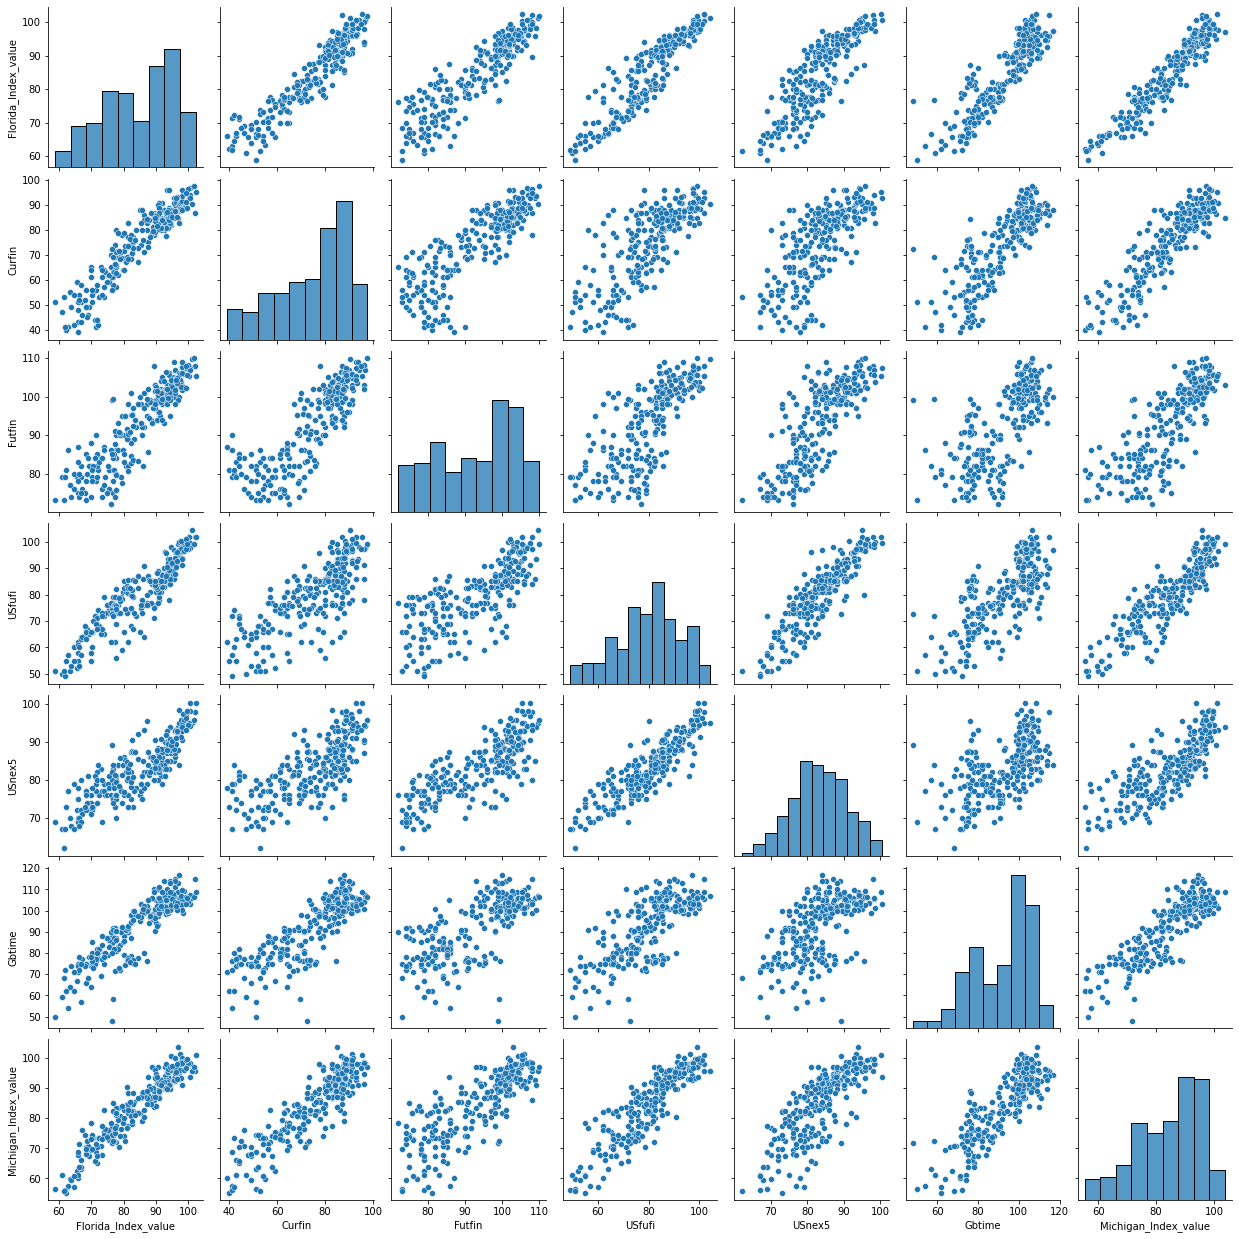

In [13]:
# fig = plt.figure(figsize = (10,10))
# ax = fig.gca()
# final.loc[: ,'Florida_Index_value':'Gbtime'].hist(ax = ax, bins=7)
# plt.show()

sns.pairplot(final.loc[: ,'Florida_Index_value':'Michigan_Index_value'])
plt.show()

From this seaborn pairplot we can confirm our suspicions that these measurements are all very highliy coorelated with each other. This includes the University of Michigan. Keeping all but one should suffice to represent the Consumer Sentinment Index number. I will take the average of University of Michigan and Florida's surverys and create a new feature to represent sentiment moving forward. 

In [14]:
final['sentiment'] = (final['Florida_Index_value']+final['Michigan_Index_value'])/2

A quick confirmation to see if it has tightened this sentiment feature.

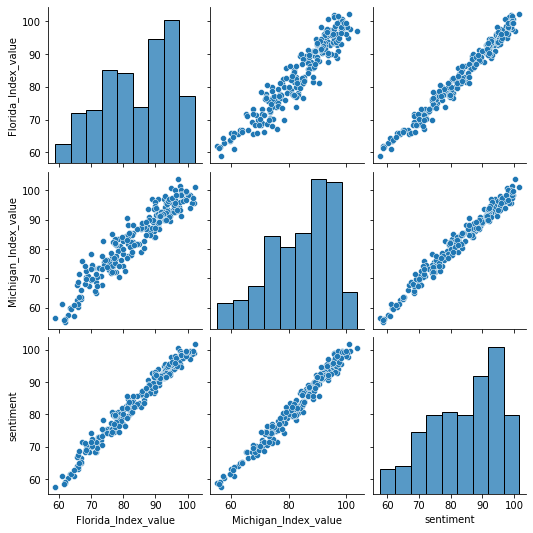

In [15]:
sns.pairplot(final.loc[:,['Florida_Index_value','Michigan_Index_value','sentiment']])
plt.show()

#### Dropping Michigan, Florida, and associated sentiment indexes to Florida. Insert sentiment to first column for ML process.

In [16]:
final = final.drop(['Florida_Index_value', 'Curfin', 'Michigan_Index_value', 
                   'Gbtime', 'USnex5', 'USfufi', 'Futfin'], axis = 1)

# shift column 'Name' to first position
first_column = final.pop('sentiment')
  
# insert column using insert(position,column_name,
# first_column) function
final.insert(0, 'sentiment', first_column)

final.head()

,sentiment,Resi_Gas,Elect_Price,Bacon Original Data Value,Bacon 1-Month Percent Change,Bacon 3-Month Percent Change,Bacon 12-Month Percent Change,Bananas Original Data Value,Bananas 1-Month Percent Change,Bananas 3-Month Percent Change,Bananas 12-Month Percent Change,Bread Original Data Value,Bread 1-Month Percent Change,Bread 3-Month Percent Change,Bread 12-Month Percent Change,Chicken Original Data Value,Chicken 1-Month Percent Change,Chicken 3-Month Percent Change,Chicken 12-Month Percent Change,Coffee Original Data Value,Coffee 1-Month Percent Change,Coffee 3-Month Percent Change,Coffee 12-Month Percent Change,Eggs Original Data Value,Eggs 1-Month Percent Change,Eggs 3-Month Percent Change,Eggs 12-Month Percent Change,Flour Original Data Value,Flour 1-Month Percent Change,Flour 3-Month Percent Change,Flour 12-Month Percent Change,Milk Original Data Value,Milk 1-Month Percent Change,Milk 3-Month Percent Change,Milk 12-Month Percent Change,Oranges Original Data Value,Oranges 1-Month Percent Change,Oranges 3-Month Percent Change,Oranges 12-Month Percent Change,Rice Original Data Value,Rice 1-Month Percent Change,Rice 3-Month Percent Change,Rice 12-Month Percent Change,Tomatoes Original Data Value,Tomatoes 1-Month Percent Change,Tomatoes 3-Month Percent Change,Tomatoes 12-Month Percent Change,Electricity_CPI Original Data Value,Electricity_CPI 1-Month Percent Change,Electricity_CPI 3-Month Percent Change,Electricity_CPI 12-Month Percent Change,Fuel_Oil_#2 Original Data Value,Fuel_Oil_#2 1-Month Percent Change,Fuel_Oil_#2 3-Month Percent Change,Fuel_Oil_#2 12-Month Percent Change,Gasoline_all_types Original Data Value,Gasoline_all_types 1-Month Percent Change,Gasoline_all_types 3-Month Percent Change,Gasoline_all_types 12-Month Percent Change,Gasoline_unleaded Original Data Value,Gasoline_unleaded 1-Month Percent Change,Gasoline_unleaded 3-Month Percent Change,Gasoline_unleaded 12-Month Percent Change,Inflation
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,94.00,10.12,7.73,2.994,-1.1,-2.4,8.9,0.500,2.7,0.8,2.0,0.982,-0.5,5.1,8.3,1.091,1.2,0.1,3.0,3.224,0.4,-2.8,-8.9,1.011,5.4,9.5,3.7,0.304,10.5,-0.7,6.3,2.852,2.4,1.7,2.4,0.638,2.2,NaN,5.1,NaN,NaN,NaN,NaN,1.414,-9.8,1.9,-2.0,0.088,2.3,0.0,4.8,1.509,-1.2,3.9,26.9,1.525,-1.2,-5.5,12.5,1.472,-1.1,-5.6,13.1,0.63
2001-02-01,91.30,10.26,8.04,3.065,2.4,0.4,6.8,0.496,-0.8,3.5,-6.1,0.994,1.2,4.3,7.6,1.090,-0.1,2.3,4.2,3.217,-0.2,-0.8,-12.5,0.943,-6.7,4.5,-2.0,0.307,1.0,17.2,15.0,2.847,-0.2,3.4,2.5,0.660,3.4,-9.0,12.6,NaN,NaN,NaN,NaN,1.313,-7.1,-12.6,2.1,0.088,0.0,2.3,3.5,1.463,-3.0,-0.9,-9.4,1.538,0.9,-4.4,8.2,1.484,0.8,-4.6,8.4,0.40
2001-03-01,92.80,9.85,8.32,3.159,3.1,4.3,7.9,0.510,2.8,4.7,-1.4,1.020,2.6,3.3,10.4,1.103,1.2,2.3,3.7,3.205,-0.4,-0.2,-11.8,0.886,-6.0,-7.6,-4.8,0.312,1.6,13.5,9.5,2.760,-3.1,-0.9,0.4,0.646,-2.1,3.5,12.9,NaN,NaN,NaN,NaN,1.336,1.8,-14.7,-2.1,0.089,1.1,3.5,4.7,1.394,-4.7,-8.8,2.6,1.503,-2.3,-2.7,-5.7,1.447,-2.5,-2.8,-6.1,0.23
2001-04-01,89.65,10.16,8.46,3.114,-1.4,4.0,5.5,0.492,-3.5,-1.6,-3.5,1.008,-1.2,2.6,8.7,1.101,-0.2,0.9,3.0,3.128,-2.4,-3.0,-12.7,1.028,16.0,1.7,9.5,0.276,-11.5,-9.2,-2.5,2.845,3.1,-0.2,2.6,0.735,13.8,15.2,28.3,NaN,NaN,NaN,NaN,1.433,7.3,1.3,-3.6,0.089,0.0,1.1,4.7,1.367,-1.9,-9.4,6.3,1.617,7.6,6.0,3.6,1.564,8.1,6.3,3.9,0.40
2001-05-01,91.80,11.14,8.83,3.256,4.6,6.2,8.3,0.509,3.5,2.6,0.0,0.995,-1.3,0.1,8.7,1.095,-0.5,0.5,4.1,3.097,-1.0,-3.7,-12.3,0.881,-14.3,-6.6,3.4,0.310,12.3,1.0,2.6,2.893,1.7,1.6,4.0,0.793,7.9,20.2,24.3,NaN,NaN,NaN,NaN,1.243,-13.3,-5.3,-9.0,0.090,1.1,2.3,5.9,1.343,-1.8,-8.2,6.3,1.812,12.1,17.8,16.8,1.729,10.5,16.5,15.4,0.45


### The next step, addressing CPI null values.

In [17]:
final.isnull().sum().sort_values(ascending=False).head(25) # checking the top 25 null values 

Coffee 12-Month Percent Change              64
Coffee 3-Month Percent Change               48
Oranges 3-Month Percent Change              46
Coffee 1-Month Percent Change               44
Coffee Original Data Value                  40
Oranges 1-Month Percent Change              37
Oranges 12-Month Percent Change             35
Rice 12-Month Percent Change                30
Oranges Original Data Value                 27
Rice 3-Month Percent Change                 21
Rice 1-Month Percent Change                 19
Rice Original Data Value                    17
Tomatoes 12-Month Percent Change             6
Tomatoes 3-Month Percent Change              6
Tomatoes 1-Month Percent Change              5
Tomatoes Original Data Value                 3
Flour 3-Month Percent Change                 2
Flour 12-Month Percent Change                2
Flour 1-Month Percent Change                 2
Chicken 12-Month Percent Change              2
Chicken 3-Month Percent Change               2
Chicken 1-Mon

### Replacement of null values:  Consumer Price Index Values

Much of the data for consumer price index is cyclical. For example oranges and coffee. I will use the 12 month percent change to visualize this:

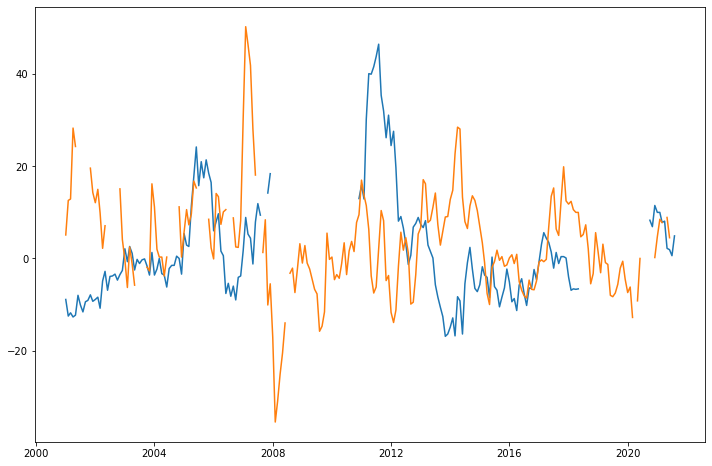

In [18]:
plt.figure(figsize=(12,8))
plt.plot(final['Coffee 12-Month Percent Change'])
plt.plot(final['Oranges 12-Month Percent Change'])
plt.show()

#### Given that there will be outliers for the majority of these consumer prices we will address this by using the median to represent the middle of the cycle.  

Side note: I am creating a file for a future two-way ANOVA test using this cleaned dataset. See Two-Way Anova notebook in github repo.

In [19]:
# applying median to all null values in the dataset.
final.fillna(final.median(), inplace=True)
final.to_csv('two_way_anova.csv')

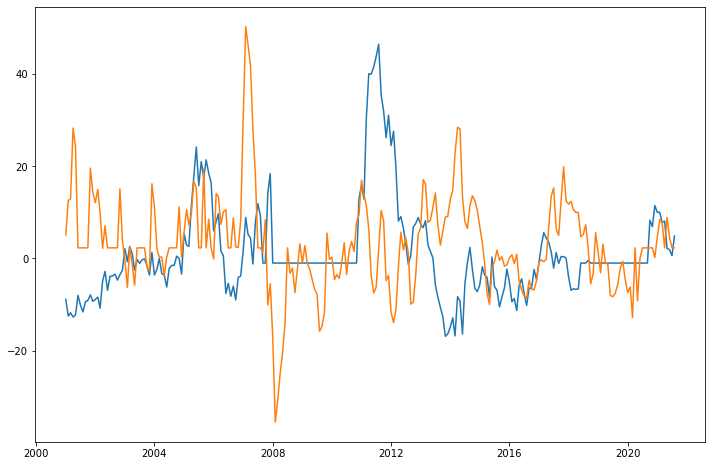

In [20]:
plt.figure(figsize=(12,8))
plt.plot(final['Coffee 12-Month Percent Change'])
plt.plot(final['Oranges 12-Month Percent Change'])
plt.show()

## Determining top features, MinMax Scaler, splitting dataset

We will add a new column called random. This column will include random numbers to be a threshold feature for what should be kept and what should be dropped using a random forest regressor. 

Our first step is to create this random column, next will be to split the data set with sentiment being the target, then scaling the split datasets accordingly. Finally, we can then use the random forest regressor to determine the most important features to keep for our multiple regression model. 

### Addressing outliers | Min-Max Scaler

The reason we use min-max scaler is to assist in removing many outliers. Specifically, we will have lower standard deviations and it suppresses the effect of outliers. I will see before scaling and after.

In [21]:
final.describe()

,sentiment,Resi_Gas,Elect_Price,Bacon Original Data Value,Bacon 1-Month Percent Change,Bacon 3-Month Percent Change,Bacon 12-Month Percent Change,Bananas Original Data Value,Bananas 1-Month Percent Change,Bananas 3-Month Percent Change,Bananas 12-Month Percent Change,Bread Original Data Value,Bread 1-Month Percent Change,Bread 3-Month Percent Change,Bread 12-Month Percent Change,Chicken Original Data Value,Chicken 1-Month Percent Change,Chicken 3-Month Percent Change,Chicken 12-Month Percent Change,Coffee Original Data Value,Coffee 1-Month Percent Change,Coffee 3-Month Percent Change,Coffee 12-Month Percent Change,Eggs Original Data Value,Eggs 1-Month Percent Change,Eggs 3-Month Percent Change,Eggs 12-Month Percent Change,Flour Original Data Value,Flour 1-Month Percent Change,Flour 3-Month Percent Change,Flour 12-Month Percent Change,Milk Original Data Value,Milk 1-Month Percent Change,Milk 3-Month Percent Change,Milk 12-Month Percent Change,Oranges Original Data Value,Oranges 1-Month Percent Change,Oranges 3-Month Percent Change,Oranges 12-Month Percent Change,Rice Original Data Value,Rice 1-Month Percent Change,Rice 3-Month Percent Change,Rice 12-Month Percent Change,Tomatoes Original Data Value,Tomatoes 1-Month Percent Change,Tomatoes 3-Month Percent Change,Tomatoes 12-Month Percent Change,Electricity_CPI Original Data Value,Electricity_CPI 1-Month Percent Change,Electricity_CPI 3-Month Percent Change,Electricity_CPI 12-Month Percent Change,Fuel_Oil_#2 Original Data Value,Fuel_Oil_#2 1-Month Percent Change,Fuel_Oil_#2 3-Month Percent Change,Fuel_Oil_#2 12-Month Percent Change,Gasoline_all_types Original Data Value,Gasoline_all_types 1-Month Percent Change,Gasoline_all_types 3-Month Percent Change,Gasoline_all_types 12-Month Percent Change,Gasoline_unleaded Original Data Value,Gasoline_unleaded 1-Month Percent Change,Gasoline_unleaded 3-Month Percent Change,Gasoline_unleaded 12-Month Percent Change,Inflation
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.00000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,84.487702,12.541855,11.315565,4.485617,0.379839,1.120565,3.820161,0.559907,0.092339,0.282661,0.929839,1.272520,0.170161,0.572984,2.552016,1.304524,0.110484,0.361694,1.925806,4.124875,0.174597,0.450403,1.024194,1.593500,0.479435,1.382661,4.566129,0.435032,0.17379,0.502419,2.360887,3.248395,0.122177,0.420161,1.564516,1.147742,0.064516,1.125403,3.325000,0.672226,0.223790,0.724597,3.229435,1.686746,0.437903,1.417742,2.358871,0.121863,0.229032,0.696371,2.328226,2.632685,0.377016,1.440323,6.044355,2.616653,0.521371,1.860887,4.778226,2.560032,0.535484,1.918952,4.940323,0.183548
std,10.887387,3.033312,1.663766,1.055713,2.710587,5.227251,8.783532,0.044669,1.726872,3.057529,5.685467,0.177584,1.688325,2.676551,6.024155,0.195152,2.328153,3.541018,5.491943,0.859904,2.711790,4.486056,10.490774,0.387899,7.094967,11.742403,19.399835,0.089183,3.70710,6.437170,11.084685,0.312526,2.311849,4.836124,9.995997,0.223146,7.787265,16.712553,10.390693,0.102701,2.433995,4.896624,11.603518,0.257443,8.243035,16.217435,13.553556,0.017492,2.090668,4.254032,3.638972,0.837733,4.789107,10.903964,24.047158,0.706574,6.339426,13.524737,20.726748,0.709499,6.505410,13.854624,21.337847,0.380525
min,57.600000,7.100000,7.730000,2.994000,-11.400000,-11.600000,-18.300000,0.469000,-6.200000,-8.200000,-10.400000,0.943000,-4.400000,-7.800000,-10.000000,1.004000,-7.200

Import the libraries needed for min-max, linear regression, and splitting of data.

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Using MixMax Scaler for the independent variables of the multiple linear regression model

In [23]:
scaler = MinMaxScaler()
final.loc[:,'Resi_Gas':'Inflation'] = scaler.fit_transform(final.loc[:,'Resi_Gas':'Inflation'])


In [24]:
final.describe()

,sentiment,Resi_Gas,Elect_Price,Bacon Original Data Value,Bacon 1-Month Percent Change,Bacon 3-Month Percent Change,Bacon 12-Month Percent Change,Bananas Original Data Value,Bananas 1-Month Percent Change,Bananas 3-Month Percent Change,Bananas 12-Month Percent Change,Bread Original Data Value,Bread 1-Month Percent Change,Bread 3-Month Percent Change,Bread 12-Month Percent Change,Chicken Original Data Value,Chicken 1-Month Percent Change,Chicken 3-Month Percent Change,Chicken 12-Month Percent Change,Coffee Original Data Value,Coffee 1-Month Percent Change,Coffee 3-Month Percent Change,Coffee 12-Month Percent Change,Eggs Original Data Value,Eggs 1-Month Percent Change,Eggs 3-Month Percent Change,Eggs 12-Month Percent Change,Flour Original Data Value,Flour 1-Month Percent Change,Flour 3-Month Percent Change,Flour 12-Month Percent Change,Milk Original Data Value,Milk 1-Month Percent Change,Milk 3-Month Percent Change,Milk 12-Month Percent Change,Oranges Original Data Value,Oranges 1-Month Percent Change,Oranges 3-Month Percent Change,Oranges 12-Month Percent Change,Rice Original Data Value,Rice 1-Month Percent Change,Rice 3-Month Percent Change,Rice 12-Month Percent Change,Tomatoes Original Data Value,Tomatoes 1-Month Percent Change,Tomatoes 3-Month Percent Change,Tomatoes 12-Month Percent Change,Electricity_CPI Original Data Value,Electricity_CPI 1-Month Percent Change,Electricity_CPI 3-Month Percent Change,Electricity_CPI 12-Month Percent Change,Fuel_Oil_#2 Original Data Value,Fuel_Oil_#2 1-Month Percent Change,Fuel_Oil_#2 3-Month Percent Change,Fuel_Oil_#2 12-Month Percent Change,Gasoline_all_types Original Data Value,Gasoline_all_types 1-Month Percent Change,Gasoline_all_types 3-Month Percent Change,Gasoline_all_types 12-Month Percent Change,Gasoline_unleaded Original Data Value,Gasoline_unleaded 1-Month Percent Change,Gasoline_unleaded 3-Month Percent Change,Gasoline_unleaded 12-Month Percent Change,Inflation
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,84.487702,0.392630,0.572774,0.363632,0.610354,0.467668,0.420535,0.528531,0.374544,0.297637,0.317362,0.546468,0.362711,0.455053,0.459781,0.404474,0.376829,0.330457,0.552616,0.414619,0.491005,0.370548,0.282716,0.347671,0.376551,0.396807,0.545120,0.570008,0.579750,0.455264,0.336678,0.453943,0.314257,0.360554,0.448615,0.535443,0.537827,0.491604,0.452506,0.570621,0.307724,0.270014,0.226707,0.385946,0.480259,0.320746,0.413416,0.604695,0.413103,0.458576,0.316411,0.429937,0.481235,0.477859,0.421695,0.481527,0.667112,0.617867,0.482193,0.483119,0.668071,0.615761,0.479378,0.669920
std,10.887387,0.218854,0.265777,0.257365,0.140445,0.192178,0.166987,0.259703,0.102790,0.107282,0.159257,0.294501,0.133994,0.145465,0.220665,0.262654,0.120008,0.097014,0.167437,0.259320,0.139066,0.133514,0.165470,0.184363,0.138574,0.145687,0.191698,0.319651,0.112678,0.155864,0.142111,0.239484,0.099221,0.110920,0.172048,0.234398,0.139307,0.193656,0.121104,0.239956,0.108178,0.118850,0.169394,0.187915,0.119464,0.129017,0.135807,0.312359,0.162067,0.219280,0.181949,0.236849,0.144250,0.149986,0.190096,0.240168,0.132071,0.150946,0.208309,0.239695,0.132763,0.151748,0.208581,0.121186
min,57.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

## Determining Feature Importance | Random Forest

Moving on to feature importance we will determine the best features for the multiple regression we will run. 

In [25]:
final['random'] = random.randint(0,1000)/1000
final.describe()

,sentiment,Resi_Gas,Elect_Price,Bacon Original Data Value,Bacon 1-Month Percent Change,Bacon 3-Month Percent Change,Bacon 12-Month Percent Change,Bananas Original Data Value,Bananas 1-Month Percent Change,Bananas 3-Month Percent Change,Bananas 12-Month Percent Change,Bread Original Data Value,Bread 1-Month Percent Change,Bread 3-Month Percent Change,Bread 12-Month Percent Change,Chicken Original Data Value,Chicken 1-Month Percent Change,Chicken 3-Month Percent Change,Chicken 12-Month Percent Change,Coffee Original Data Value,Coffee 1-Month Percent Change,Coffee 3-Month Percent Change,Coffee 12-Month Percent Change,Eggs Original Data Value,Eggs 1-Month Percent Change,Eggs 3-Month Percent Change,Eggs 12-Month Percent Change,Flour Original Data Value,Flour 1-Month Percent Change,Flour 3-Month Percent Change,Flour 12-Month Percent Change,Milk Original Data Value,Milk 1-Month Percent Change,Milk 3-Month Percent Change,Milk 12-Month Percent Change,Oranges Original Data Value,Oranges 1-Month Percent Change,Oranges 3-Month Percent Change,Oranges 12-Month Percent Change,Rice Original Data Value,Rice 1-Month Percent Change,Rice 3-Month Percent Change,Rice 12-Month Percent Change,Tomatoes Original Data Value,Tomatoes 1-Month Percent Change,Tomatoes 3-Month Percent Change,Tomatoes 12-Month Percent Change,Electricity_CPI Original Data Value,Electricity_CPI 1-Month Percent Change,Electricity_CPI 3-Month Percent Change,Electricity_CPI 12-Month Percent Change,Fuel_Oil_#2 Original Data Value,Fuel_Oil_#2 1-Month Percent Change,Fuel_Oil_#2 3-Month Percent Change,Fuel_Oil_#2 12-Month Percent Change,Gasoline_all_types Original Data Value,Gasoline_all_types 1-Month Percent Change,Gasoline_all_types 3-Month Percent Change,Gasoline_all_types 12-Month Percent Change,Gasoline_unleaded Original Data Value,Gasoline_unleaded 1-Month Percent Change,Gasoline_unleaded 3-Month Percent Change,Gasoline_unleaded 12-Month Percent Change,Inflation,random
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,84.487702,0.392630,0.572774,0.363632,0.610354,0.467668,0.420535,0.528531,0.374544,0.297637,0.317362,0.546468,0.362711,0.455053,0.459781,0.404474,0.376829,0.330457,0.552616,0.414619,0.491005,0.370548,0.282716,0.347671,0.376551,0.396807,0.545120,0.570008,0.579750,0.455264,0.336678,0.453943,0.314257,0.360554,0.448615,0.535443,0.537827,0.491604,0.452506,0.570621,0.307724,0.270014,0.226707,0.385946,0.480259,0.320746,0.413416,0.604695,0.413103,0.458576,0.316411,0.429937,0.481235,0.477859,0.421695,0.481527,0.667112,0.617867,0.482193,0.483119,0.668071,0.615761,0.479378,0.669920,9.800000e-02
std,10.887387,0.218854,0.265777,0.257365,0.140445,0.192178,0.166987,0.259703,0.102790,0.107282,0.159257,0.294501,0.133994,0.145465,0.220665,0.262654,0.120008,0.097014,0.167437,0.259320,0.139066,0.133514,0.165470,0.184363,0.138574,0.145687,0.191698,0.319651,0.112678,0.155864,0.142111,0.239484,0.099221,0.110920,0.172048,0.234398,0.139307,0.193656,0.121104,0.239956,0.108178,0.118850,0.169394,0.187915,0.119464,0.129017,0.135807,0.312359,0.162067,0.219280,0.181949,0.236849,0.144250,0.149986,0.190096,0.240168,0.132071,0.150946,0.208309,0.239695,0.132763,0.151748,0.208581,0.121186,1.390585e-16
min,57.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

Adding the library RandomForestRegressor to the notebook.

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
model= RandomForestRegressor() # the model is the randomforestregressor

In [28]:
model.fit(final.loc[:,'Resi_Gas':'random'],final['sentiment']) # fit the train sets to the model
# sentiment is the dependent variable

RandomForestRegressor()

This importance list code comes from Professor Mike Busch at Regis University. This was used in a prior project I completed for education on machine learning features. I have adapated it for use in this project to eliminate features that may not be important to the overall accuracy of this model.

Mike Busch, D.C.S. <br>
Assistant Professor | Data Sciences <br>
mbusch@regis.edu | 303.964.6150 | Anderson College of Business and Computing

In [29]:
importance_list = list(zip(final.loc[:,'Resi_Gas':'random'].columns, model.feature_importances_)) # we make a list of the X columns back to the feature
sorted_importance = sorted(importance_list, key=lambda x: x[1], reverse=True)  # sort the list using a lambda function

In [30]:
max_feature_len = len(max(final.loc[:,'Resi_Gas':'random'].columns, key=len)) # length = max number of columns

In [31]:
for feature, rank in sorted_importance: # create a for loop to iterate over the sorted importance list
    dots = max_feature_len - len(feature) # clean the list output to have periods consistent down the list
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

Bananas Original Data Value: ............... 39.37%
Chicken Original Data Value: ............... 12.17%
Bread Original Data Value: ................. 6.12%
Bananas 12-Month Percent Change: ........... 3.88%
Gasoline_unleaded Original Data Value: ..... 2.99%
Chicken 12-Month Percent Change: ........... 2.82%
Fuel_Oil_#2 Original Data Value: ........... 2.46%
Bacon 12-Month Percent Change: ............. 2.41%
Bread 12-Month Percent Change: ............. 2.39%
Elect_Price: ............................... 2.20%
Gasoline_all_types 12-Month Percent Change:  2.10%
Bacon Original Data Value: ................. 1.84%
Flour 12-Month Percent Change: ............. 1.50%
Gasoline_unleaded 12-Month Percent Change: . 1.48%
Gasoline_all_types Original Data Value: .... 1.38%
Milk Original Data Value: .................. 1.30%
Eggs Original Data Value: .................. 1.07%
Rice 12-Month Percent Change: .............. 0.88%
Electricity_CPI Original Data Value: ....... 0.66%
Eggs 12-Month Percent Change:

It does not look like Random Forest Regressor assisted much in providing clarity here. All features are above the random feature created.

Given the amount of features I will ignore a heatmap of correlations as it would just be a sea of colors for the moment. Instead I will opt for a VIF test, to see the highest factors and reduce the dataset further.

### Multicollinearity | VIF 

Using the statsmodels library, there is a variance inflation factor test. We will use this test to determine next steps.

In [32]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame() # create a df for the VIF values
vif["features"] = final.loc[:,'Resi_Gas':'random'].columns # column created for feature names
vif["vif_Factor"] = [variance_inflation_factor(final.loc[:,'Resi_Gas':'random'].values, i) # column created within df feature VIF value
                     for i in range(final.loc[:,'Resi_Gas':'random'].shape[1])] #rows counted
vif.sort_values(by='vif_Factor', ascending=False).head(20) # sort the values descending TOP 10

,features,vif_Factor
58,Gasoline_unleaded Original Data Value,42556.755952
54,Gasoline_all_types Original Data Value,42448.539914
61,Gasoline_unleaded 12-Month Percent Change,4504.816689
57,Gasoline_all_types 12-Month Percent Change,4451.627479
60,Gasoline_unleaded 3-Month Percent Change,3143.720318
56,Gasoline_all_types 3-Month Percent Change,3074.936233
59,Gasoline_unleaded 1-Month Percent Change,1196.611870
55,Gasoline_all_types 1-Month Percent Change,1195.210077
63,random,404.265838
46,Electricity_CPI Original Data Value,228.449131


The top 10 values with the highest multicollinearity are listed above. Gasoline leads the way, followed by random, and electricity pricing from the consumer price index. 

Given we want to have a complete understanding of the values I will produce a heatmap of correlations. This will be large given the amount of features. However, I will sort it by sentiment, the target, because we should see negative correlations as well. I want to keep those negative correlations as it is indicitive of the consumers negative interaction with those relationships.

### Heatmap of Correlations of new dataset

<AxesSubplot:>

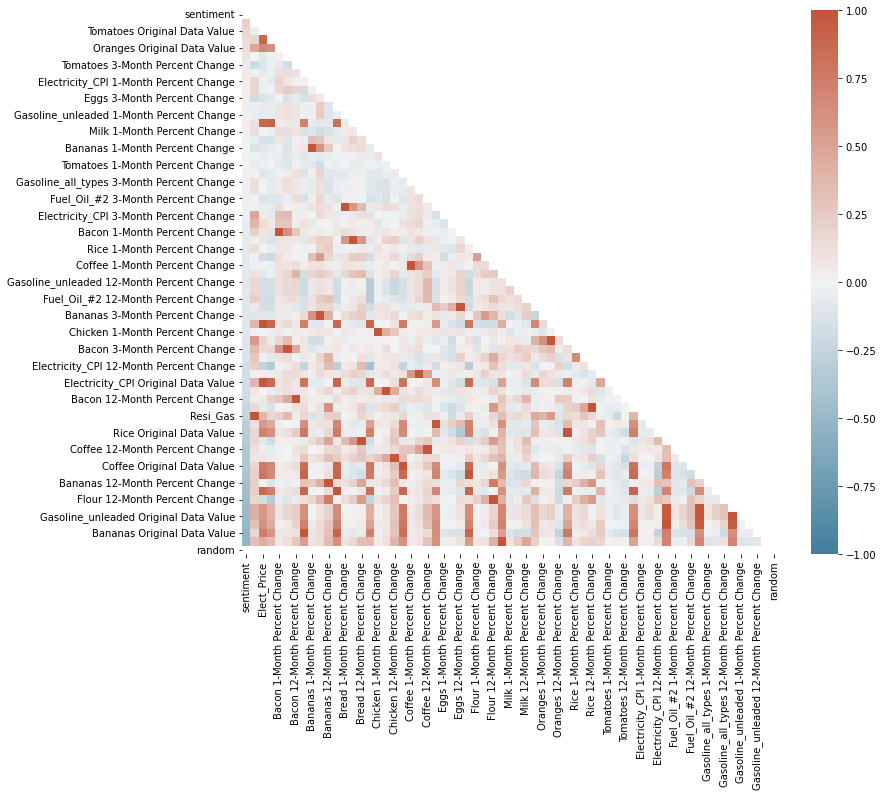

In [33]:
# plt.figure(figsize=(20,10))
# sns.heatmap(final.corr().sort_values(by='sentiment', ascending=False), annot = True)

corr = final.corr().sort_values(by='sentiment', ascending=False)
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, mask = mask, cmap=cmap,  vmin=-1)

Just focus on the left-most column. I have organized this heatmap to show us the highest and low correlations to sentiment the target of this model. We see that random is the most negatively correlated, it will be dropped as it is of no concern now. However we also see that sentiment is negatively correlated to Bananas, Gasoline, Flour, 

In [34]:
final_ovalues = final[final.columns.drop(list(final.filter(regex='Month Percent Change')))]


<AxesSubplot:>

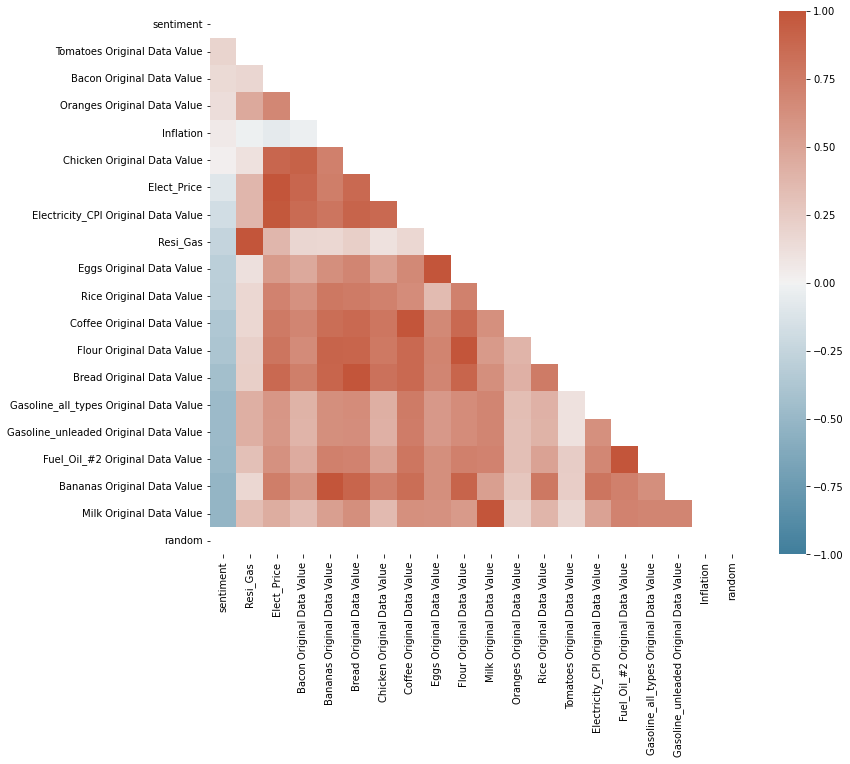

In [35]:
# plt.figure(figsize=(20,10))
# sns.heatmap(final.corr().sort_values(by='sentiment', ascending=False), annot = True)

corr = final_ovalues.corr().sort_values(by='sentiment', ascending=False)
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, mask = mask, cmap=cmap,  vmin=-1)

We see that there are quite a bit of high correlations between many of the food consumer index prices. While I would like to research further, potentially creating a new feature with these averaged. I believe it best to continue as dropping would cause a significant loss in variance explanation. 

In [36]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame() # create a df for the VIF values
vif["features"] = final_ovalues.loc[:,'Resi_Gas':'Inflation'].columns # column created for feature names
vif["vif_Factor"] = [variance_inflation_factor(final_ovalues.loc[:,'Resi_Gas':'Inflation'].values, i) # column created within df feature VIF value
                     for i in range(final_ovalues.loc[:,'Resi_Gas':'Inflation'].shape[1])] #rows counted
vif.sort_values(by='vif_Factor', ascending=False).head(20) # sort the values descending TOP 10

,features,vif_Factor
16,Gasoline_unleaded Original Data Value,39497.418311
15,Gasoline_all_types Original Data Value,38435.326334
1,Elect_Price,273.254578
13,Electricity_CPI Original Data Value,266.980063
14,Fuel_Oil_#2 Original Data Value,126.953298
4,Bread Original Data Value,86.041353
3,Bananas Original Data Value,68.659592
8,Flour Original Data Value,53.840712
5,Chicken Original Data Value,51.123386
6,Coffee Original Data Value,42.943638


In [37]:
final_ovalues = final_ovalues.drop(['Gasoline_all_types Original Data Value',
                                    'Electricity_CPI Original Data Value',
                                    'Fuel_Oil_#2 Original Data Value'], axis=1)




In [38]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame() # create a df for the VIF values
vif["features"] = final_ovalues.loc[:,'Resi_Gas':'Inflation'].columns # column created for feature names
vif["vif_Factor"] = [variance_inflation_factor(final_ovalues.loc[:,'Resi_Gas':'Inflation'].values, i) # column created within df feature VIF value
                     for i in range(final_ovalues.loc[:,'Resi_Gas':'Inflation'].shape[1])] #rows counted
vif.sort_values(by='vif_Factor', ascending=False).head(50) # sort the values descending TOP 10

,features,vif_Factor
1,Elect_Price,133.174730
4,Bread Original Data Value,68.911455
3,Bananas Original Data Value,51.631204
5,Chicken Original Data Value,47.932535
6,Coffee Original Data Value,42.469313
8,Flour Original Data Value,37.607278
2,Bacon Original Data Value,31.983253
13,Gasoline_unleaded Original Data Value,24.676549
11,Rice Original Data Value,22.755416
10,Oranges Original Data Value,15.517464


In [39]:
final_ovalues.head()

,sentiment,Resi_Gas,Elect_Price,Bacon Original Data Value,Bananas Original Data Value,Bread Original Data Value,Chicken Original Data Value,Coffee Original Data Value,Eggs Original Data Value,Flour Original Data Value,Milk Original Data Value,Oranges Original Data Value,Rice Original Data Value,Tomatoes Original Data Value,Gasoline_unleaded Original Data Value,Inflation,random
Date,,,,,,,,,,,,,,,,,
2001-01-01,94.00,0.217893,0.000000,0.000000,0.180233,0.064677,0.117093,0.142943,0.070817,0.100358,0.150192,0.000000,0.658879,0.186861,0.115541,0.812102,0.098
2001-02-01,91.30,0.227994,0.049521,0.017309,0.156977,0.084577,0.115747,0.140832,0.038498,0.111111,0.146360,0.023109,0.658879,0.113139,0.119595,0.738854,0.098
2001-03-01,92.80,0.198413,0.094249,0.040224,0.238372,0.127695,0.133244,0.137214,0.011407,0.129032,0.079693,0.008403,0.658879,0.129927,0.107095,0.684713,0.098
2001-04-01,89.65,0.220779,0.116613,0.029254,0.133721,0.107794,0.130552,0.113993,0.078897,0.000000,0.144828,0.101891,0.658879,0.200730,0.146622,0.738854,0.098
2001-05-01,91.80,0.291486,0.175719,0.063871,0.232558,0.086235,0.122476,0.104644,0.009030,0.121864,0.181609,0.162815,0.658879,0.062044,0.202365,0.754777,0.098


# Multiple Linear Regression 

### Parametric Assumption: The dependent variable is normal?

I will need to make sure that sentiment is normal before proceeding with the multiple linear regresssion model. Given it is a parametric model. 

<AxesSubplot:>

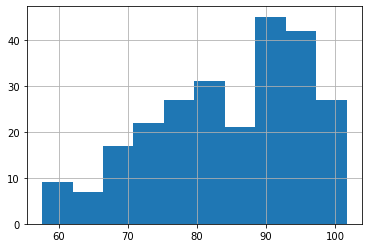

In [40]:
final_ovalues['sentiment'].hist()

The distribution does not appear to be normal. I will use a log transformation to make it as normal as feasible.

In [41]:
final_ovalues['sentiment'] = np.log(final_ovalues['sentiment'])

<AxesSubplot:>

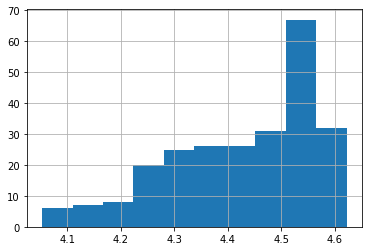

In [42]:
final_ovalues['sentiment'].hist()

## Splitting the dataset

In [43]:
# target is sentiment using the removed orginal values version of Final
X_train, X_test, y_train, y_test = train_test_split(final_ovalues.loc[:,'Resi_Gas':'Inflation'],final_ovalues['sentiment'],test_size=0.3,
                                                   random_state=0)


### Fit Linear Regression Model|

In [44]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Predicting test set results

In [45]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.8338778822248631

### Plotting Results

Text(0.5, 1.0, 'Actual vs. Predicted')

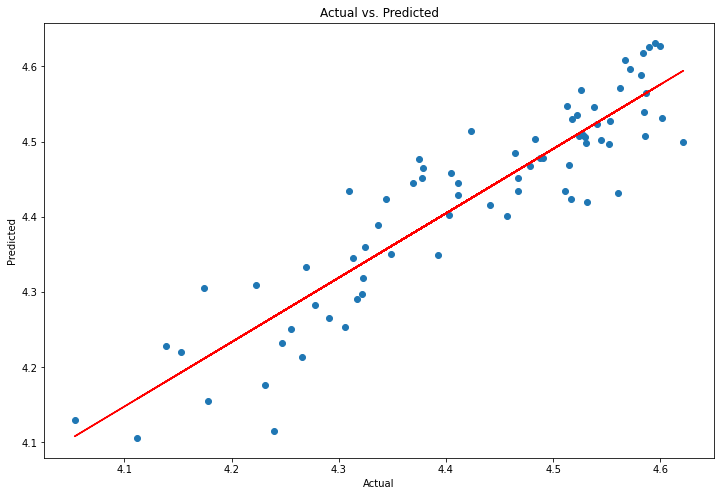

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, y_pred, 1)

#add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b, color='red')
plt.title('Actual vs. Predicted')

### Reviewing p-values of Multiple Linear Regression Models

Using the statsmodels OLS we can review more information that SciKit learn simply does not provide.



In [47]:
X = final_ovalues.loc[:,'Resi_Gas':'Inflation']#.values
y = final_ovalues['sentiment']#.values  
# Linear regression using Statsmodels
const_X = sm.add_constant(X)
model_ols = sm.OLS(y, const_X)
linreg = model_ols.fit()

C:\Users\stanl\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     70.66
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           1.51e-77
Time:                        10:35:43   Log-Likelihood:                 357.46
No. Observations:                 248   AIC:                            -682.9
Df Residuals:                     232   BIC:                            -626.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     4.5205      0.031    144.423      0.000       4.459       4.582
Resi_Gas                                 -0.1166      0.026     -4.429      0.000      -0.169      -0.065
Elect_Price                               0.2706      0.069      3.935      0.000       0.135       0.406
Bacon Original Data Value                 0.2178      0.050      4.359      0.000       0.119       0.316
Bananas Original Data Value              -0.2587      0.046     -5.581      0.000      -0.350      -0.167
Bread Original Data Value                -0.4809      0.052     -9.309      0.000      -0.583      -0.379
Chicken Original Data Value               0.1626      0.054      3.007      0.003       0.056       0.269
Coffee Original Data Value                0.0136      0.052      0.265      0.792      -0.088       0.115
Eggs Original Data Value                  0.0871      0.035      2.480      0.014       0.018       0.156
Flour Original Data Value                 0.0637      0.036      1.779      0.077      -0.007       0.134
Milk Original Data Value                 -0.0546      0.028     -1.939      0.054      -0.110       0.001
Oranges Original Data Value              -0.0128      0.028     -0.461      0.645      -0.067       0.042
Rice Original Data Value                 -0.0323      0.030     -1.073      0.284      -0.092       0.027
Tomatoes Original Data Value              0.0434      0.029      1.511      0.132      -0.013       0.100
Gasoline_unleaded Original Data Value    -0.0683      0.036     -1.903      0.058      -0.139       0.002
Inflation                                 0.0697      0.035      1.997      0.047       0.001       0.138
==============================================================================
Omnibus:                       11.028   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.826
Skew:                          -0.433   Prob(JB):                      0.00270
Kurtosis:                       3.629   Cond. No.                         51.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Findings:

This model is considered to be a better with independet variables included given the f-statistic p-value of 1.51e-77

The following features meet the .05 level:
- Residential Natural Gas Price
- Electrical Price <br>
#### Commodity Prices <br>
- Bacon
- Bananas 
- Bread
- Chicken
- Eggs
- Inflation

Surprising that gas unleaded prices and milk do not meet the .05 level. 

#### Coefficients of p-values meeting the .05 level

- Resi_Gas	__-0.1166__
- Elect_Price	__0.2706__
- Bacon __0.2178__	
- Bananas 	__-0.2587__	
- Bread 	__-0.4809__
- Chicken __0.1626__
- Eggs __0.0871__
- Inflation	__0.0697__

Residential Natural Gas increases cause negative sentiment, as well as Bananas and Bread. However surprisingly Inflation increases cause a positive increase in sentiment. 

#### Reviewing Residuals for Inflation

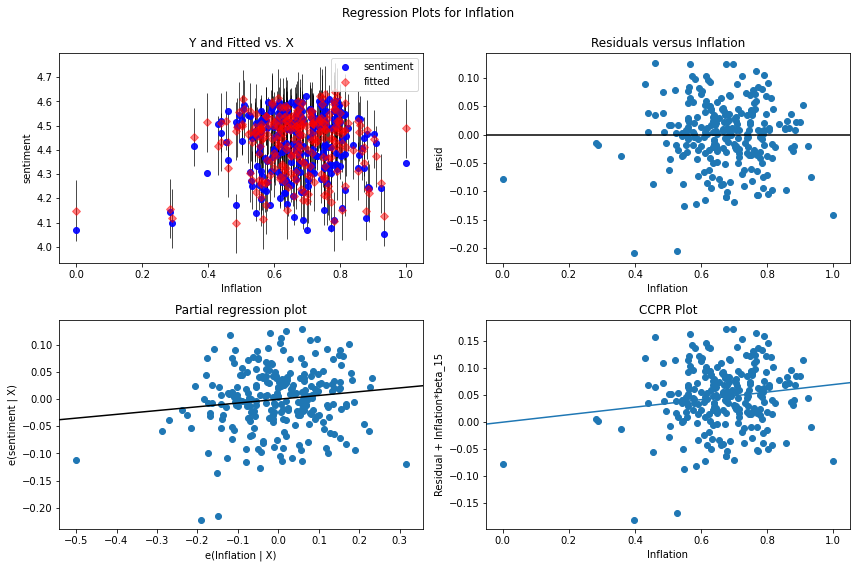

In [49]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(linreg, 'Inflation', fig=fig)

### Plot of Actual vs Predicted model given Adjusted R^2 of 81%

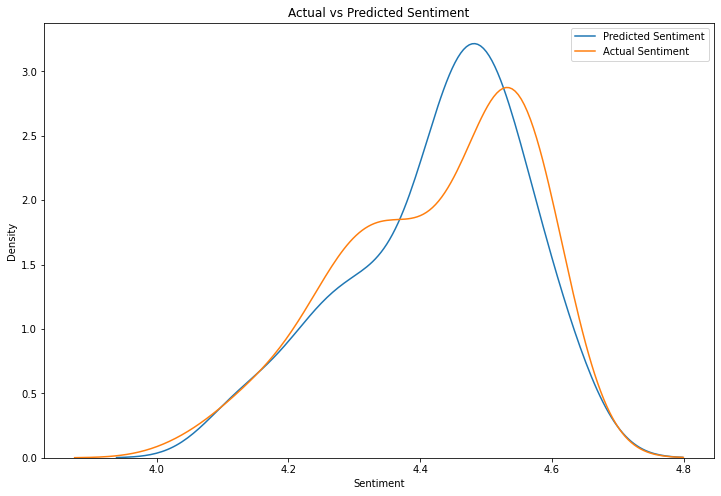

In [50]:
import warnings
warnings.filterwarnings("ignore")
outcome = 'Sentiment'
y_hat = lr.predict(X_test)
plt.figure(figsize=(12,8))
sns.distplot(y_hat, hist = False, label = f'Predicted {outcome}')
sns.distplot(y_test, hist = False, label = f'Actual {outcome}')
plt.title(f'Actual vs Predicted {outcome}')
plt.xlabel(outcome)
plt.ylabel('Density')
plt.legend()
plt.show()

# ---------------------------------------------------------------

## Random Forest Regressor Model
Given that a linear regression model is parametric, I would like to see how a nonparametric model performs. I will introduce a random forest regressor model. 

### Increasing the number of trees used in the random forest regressor 

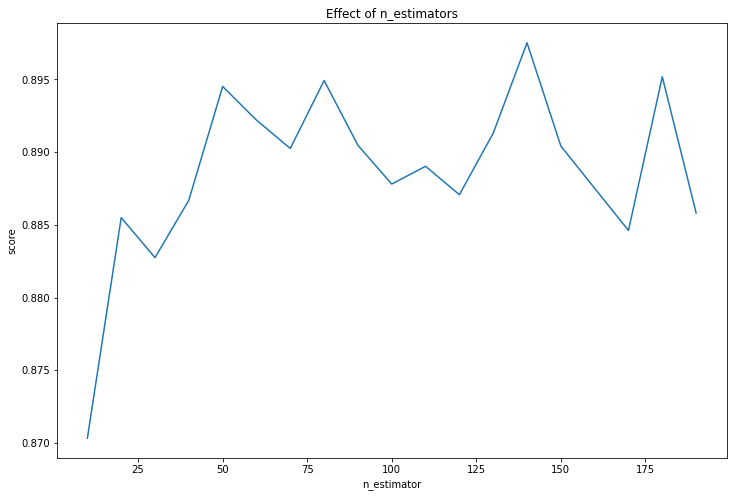

In [51]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(12,8))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

### When we follow the effect of n_estimators we see that around 140 trees is best for the future model. So we will now apply this to the model. 

R-squared: 0.9784220300554758
MSE:  0.002175073095091091
RMSE:  0.0010875365475455454


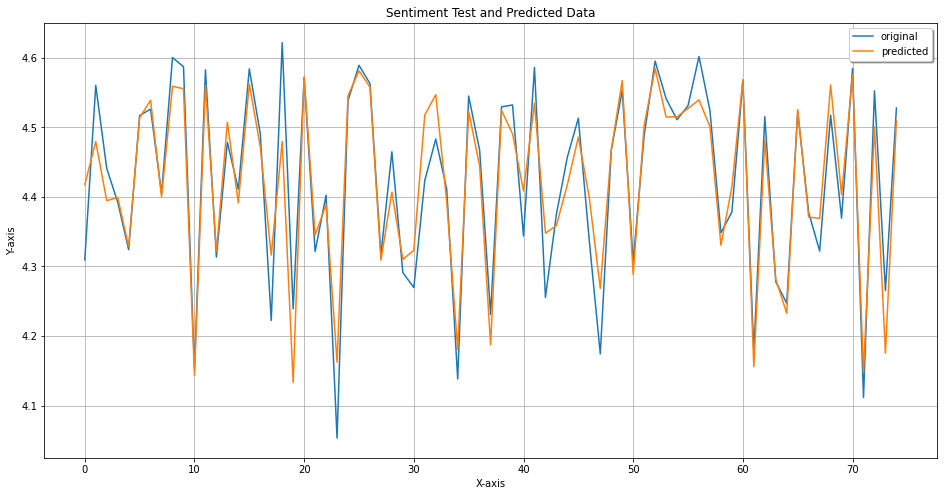

In [59]:
rfr = RandomForestRegressor(n_estimators=140)
rfr.fit(X_train, y_train)

score = rfr.score(X_train, y_train)
print("R-squared:", score)

ypred = rfr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(y_test))
plt.figure(figsize=(16,8))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Sentiment Test and Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### R-squared: 0.978<br>MSE:  0.0021<br>RMSE:  0.001
Interpretation:

Having a R-Squared of 97.8% shows our explained variance. We could say that this model accounts for 97.8% of the variance in consumer sentiment. Having a mean squared error of 0.0021 shows how close to the slope we truly are and the root mean squared error is our standard deviation of these residual errors. In other words this model is very accurate. There could be cause for concern of overfitting, but given this is a decision tree based model this is a reduced risk.  

## Conclusion:



Overall, I see that consumer sentiment is is predicted by the use of the independent variables chosen through EIA, Inflation index, and Bureau of Labor Statistics. Having a F-statistic being so substantially low confirms this. However, given that the assumptions of a parametric test are a concern I chose to include a Random Forest Regressor model to involve nonparametric methods. This resulted in an R-Squared of 97.9% compared to the Multiple Linear Regression that was 81%. I conclude that a nonparametric model is best given the distribution of the dependent variable and the variances of the independent variables.


